In [1]:
# importing the dependencies
import numpy as np
import librosa
import matplotlib.pyplot as plt
%matplotlib inline

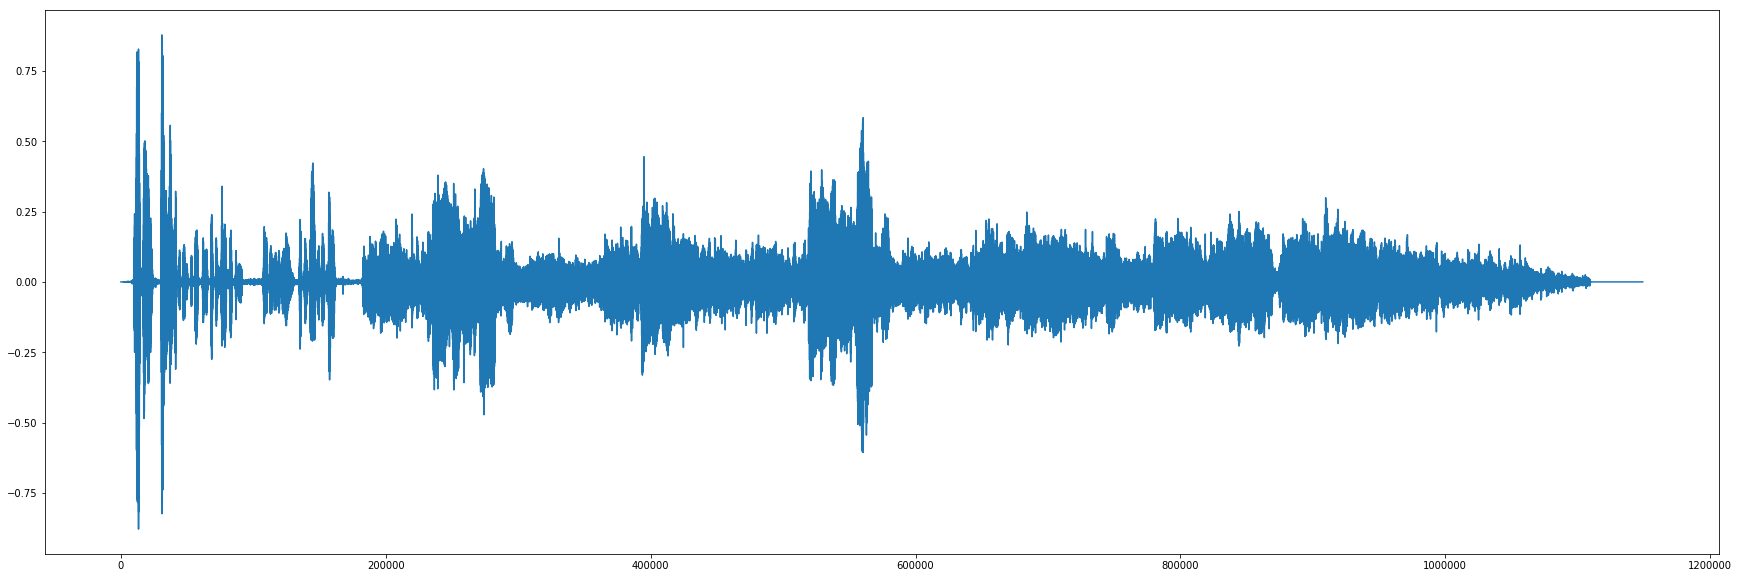

In [5]:
path_file = '/Users/path/to/file.mp3y, sr = librosa.load(path_file)
y = librosa.core.to_mono(y)
plt.figure(figsize = (30, 10))
plt.plot(y)

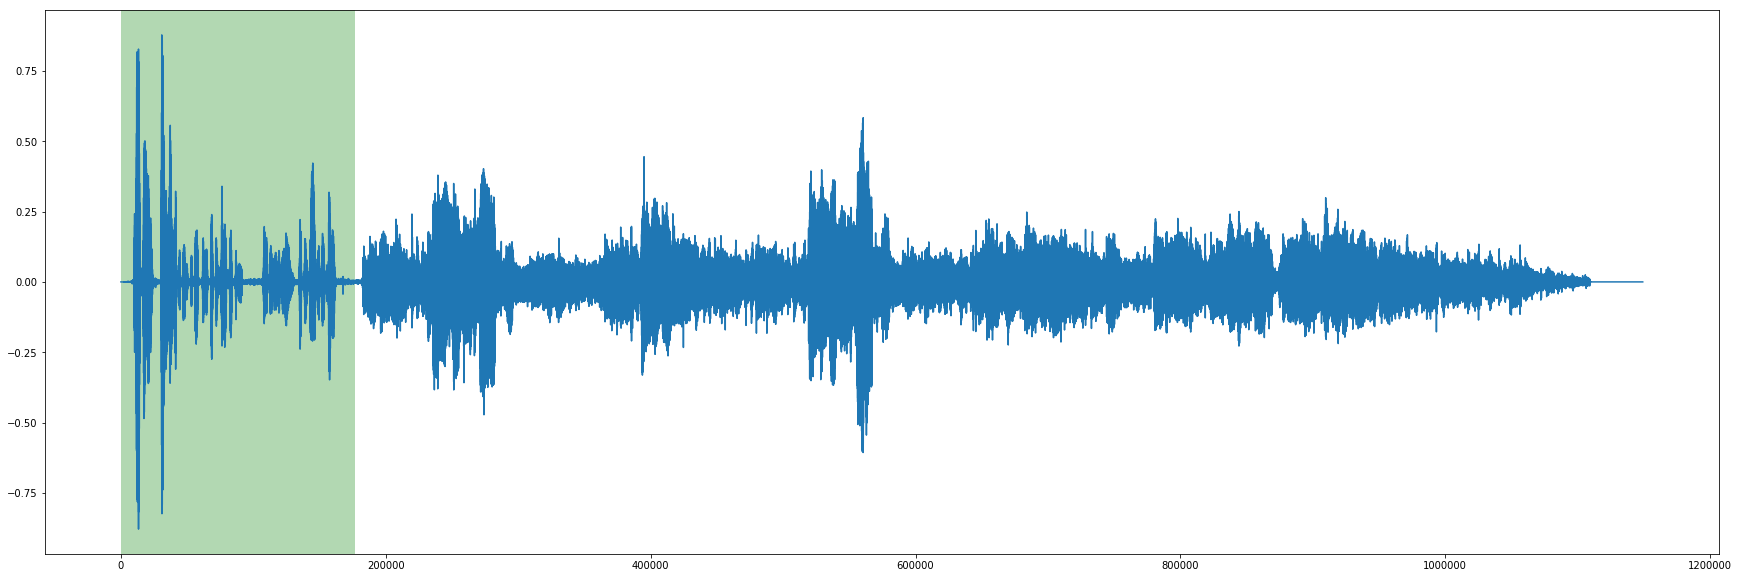

In [9]:
# after listening to the audio, we can see that first 8 seconds are
# for the speech while rest of it is waiting music
# making the segement and plotting the audio
# masked green part is speech
time = 8 # sec
plt.figure(figsize = (30, 10))
plt.plot(y)
plt.axvspan(0, sr * time, facecolor = 'g', alpha = 0.3)

In [83]:
# STEP 1: CONVERTING TO SAMPLES
# converting the segment to samples
seglen = 100 # ms
segsamples = int(sr*seglen / 1000)
num_samples = int((len(y) * 1000) / (sr * seglen))
num_samples_speech = int(sr * time/1000)

# # making the labels
# if speech then class 1
# else class 2
labels_ = [[1,0] for _ in range(num_samples_speech)]
for _ in range(num_samples - num_samples_speech):
    labels_.append([0,1])

# makign data
samples_ = []
for i in range(num_samples):
    seg = y[i*segsamples: (i+1)*segsamples]
    samples_.append(seg)

In [84]:
print(num_samples)
print(num_samples_speech)

521
176


In [85]:
# STEP 2: CONVERT THE AUDIO TO MFCC SAMPLES
mfcc_data = []
for d in samples_:
    mfcc = librosa.feature.mfcc(d, sr = sr, n_mfcc = 15)
    mfcc_data.append(np.reshape(mfcc, [15, 5, 1]))

In [94]:
mfcc_data_np = np.array(mfcc_data)
print(mfcc_data_np.shape)

(521, 15, 5, 1)


[1, 0]


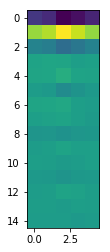

In [86]:
# testing a mfcc
s = samples_[200]
mfcc = librosa.feature.mfcc(s, sr = sr, n_mfcc = 15)
plt.imshow(mfcc)
print(labels_[1])

In [65]:
# STEP 3:  MAKING THE NEURAL NETWORK
# we will be using keraas as our library for ML
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten

In [88]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (15, 5, 1)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(2))
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 13, 3, 32)         320       
_________________________________________________________________
flatten_4 (Flatten)          (None, 1248)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1248)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                79936     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 80,386
Trainable params: 80,386
Non-trainable params: 0
_________________________________________________________________
Instru

In [95]:
# STEP 4: TRAINING THE NEURAL NETWORK
model.fit(x = mfcc_data_np, y = labels_, batch_size = 124, epochs = 10, shuffle = True, validation_split = 0.2)

Train on 416 samples, validate on 105 samples
Epoch 1/10
416/416 [==============================] - 1s - loss: 7.6048 - acc: 0.0036 - val_loss: 1.3665 - val_acc: 0.0000e+00
Epoch 2/10
416/416 [==============================] - 0s - loss: 6.7375 - acc: 0.0048 - val_loss: 1.2906 - val_acc: 0.0000e+00
Epoch 3/10
416/416 [==============================] - 0s - loss: 6.6852 - acc: 0.0000e+00 - val_loss: 1.0960e-07 - val_acc: 0.0000e+00
Epoch 4/10
416/416 [==============================] - 0s - loss: 6.7627 - acc: 0.0000e+00 - val_loss: 1.0960e-07 - val_acc: 0.0000e+00
Epoch 5/10
416/416 [==============================] - 0s - loss: 6.7820 - acc: 0.0000e+00 - val_loss: 1.0960e-07 - val_acc: 0.0000e+00
Epoch 6/10
416/416 [==============================] - 0s - loss: 6.7820 - acc: 0.0000e+00 - val_loss: 1.0960e-07 - val_acc: 0.0000e+00
Epoch 7/10
416/416 [==============================] - 0s - loss: 6.7820 - acc: 0.0000e+00 - val_loss: 1.0960e-07 - val_acc: 0.0000e+00
Epoch 8/10
416/416 [=====

In [ ]:
# STEP 5: RUNTIME MODEL
# let any sample be 